Part 1

In [23]:
import os
import numpy as np
import scipy as sp
import random
import matplotlib.pyplot as plt
import IPython
import sounddevice as sd
import soundfile as sf

Step 1.0

In [14]:
music_stereo, f1 = sf.read('music.wav')
music_mono = music_stereo[:,0]/2 + music_stereo[:,1]/2 # Convert to mono format

music = music_mono / np.amax(abs(music_mono)) # Music normalized 

N = 512 # frame length
hann = np.hanning(N)
                             
size = np.size(music)
frames = []                             

#print(size//512)
#print(size/512)

i = 0 
while i <= (size - 512):
    frames.append(music[i:i+512]*hann)   # List of frames of 512 specimens windowed with hanning
    i = i + 512

#print(len(frames))

Zeros = np.zeros(512 - (size - i))
frames.append(np.concatenate((music[i:], Zeros), axis = None)*hann)

#print(np.size(frames[-1]))
#print(frames[-1])

Text(0.5, 1.0, 'Power Spectrum of 3rd frame')

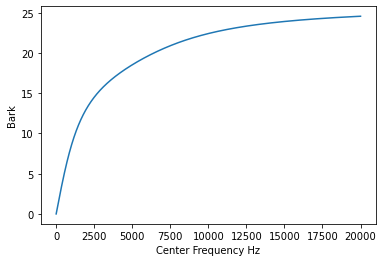

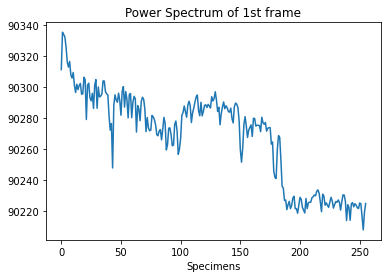

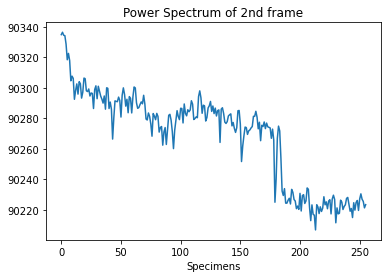

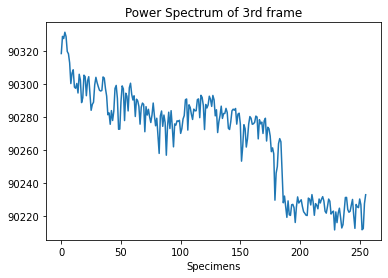

In [33]:
%matplotlib inline
f = np.arange(0,20000,1)
b = 13* np.arctan(0.00076*f) + 3.5*np.arctan((f/7500)**2) # bark scale

plt.figure(1)
plt.plot(f,b)
plt.xlabel('Center Frequency Hz')
plt.ylabel('Bark')

Power_Spectrum = []
PN = 90302

for frame in frames:
    p = 20*np.log10(abs(np.fft.fft(frame))) + PN
    p_cut = p[:256]
    Power_Spectrum.append(p_cut)

plt.figure(2)
k = np.arange(0,256,1)
plt.plot(k,Power_Spectrum[1])
plt.xlabel('Specimens')
plt.title('Power Spectrum of 1st frame')

plt.figure(3)
plt.plot(k,Power_Spectrum[2])
plt.xlabel('Specimens')
plt.title('Power Spectrum of 2nd frame')

plt.figure(4)
plt.plot(k,Power_Spectrum[3])
plt.xlabel('Specimens')
plt.title('Power Spectrum of 3rd frame')    

In [38]:
def St(k, power_spectrum):
    bool = True 
    i = 2
    if k >= 2:
        bool = False
    elif 2 < k < 63 :
        predicate_1 = power_spectrum[k] > power_spectrum[k - 1] and power_spectrum[k] > power_spectrum[k + 1]
        bool = predicate_1 and bool
        while i <= 2:
            predicate = power_spectrum[k] > (power_spectrum[k - i] + 7) and power_spectrum[k] > (power_spectrum[k + i] + 7)
            bool = predicate and bool
            i = i + 1
    elif 63 <= k < 127 :
        predicate_1 = power_spectrum[k] > power_spectrum[k - 1] and power_spectrum[k] > power_spectrum[k + 1]
        bool = predicate_1 and bool
        while i <= 3:
            predicate = power_spectrum[k] > (power_spectrum[k - i] + 7) and power_spectrum[k] > (power_spectrum[k + i] + 7)
            bool = predicate and bool
            i = i + 1
    elif 127 <= k <= 250 :
        predicate_1 = power_spectrum[k] > power_spectrum[k - 1] and power_spectrum[k] > power_spectrum[k + 1]
        bool = predicate_1 and bool
        while i <= 6:
            predicate = power_spectrum[k] > (power_spectrum[k - i] + 7) and power_spectrum[k] > (power_spectrum[k + i] + 7)
            bool = predicate and bool
            i = i + 1
    return bool

Masks = []
i = 0
for power_spectrum in Power_Spectrum:
    Masks.append(np.zeros(256))
    for k in range(256):
        if(St(k, power_spectrum)):
            Masks[i][k] = 10*np.log10(10**(0.1*power_spectrum[k-1]) + 10**(0.1*power_spectrum[k]) + 10**(0.1*power_spectrum[k+1]))
    i = i + 1    
    
Noise_masks = np.load('P_NM.npy')
#print(Noise_masks)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10980\2331416956.py:35: RuntimeWarning: overflow encountered in double_scalars
  Masks[i][k] = 10*np.log10(10**(0.1*power_spectrum[k-1]) + 10**(0.1*power_spectrum[k]) + 10**(0.1*power_spectrum[k+1]))
